# ODSC Predictive Modeling Workshop

11/4/2017

## Prerequisites 

Download Data: https://goo.gl/AoR7xn

Anaconda: https://www.anaconda.com/download/

## Load Packages

In [407]:
%matplotlib inline 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn

## Data Import


The dataset is extracted from a research study that can be found online. <br>
https://www.hindawi.com/journals/bmri/2014/781670/sup/

Data dictionary<br>
https://www.hindawi.com/journals/bmri/2014/781670/tab1/

The business problem defined is<br>
"**Can we predict which patient will be readmitted to the hospital within the first 30 days from discharge**?"

Here is an article on the background of hospital readmission. In short, one big problem in healthcare industry today is the rising cost of patient readmission.
https://www.speechmed.com/cost-hospital-readmission/


The data set we are using today has been sampled down for demo purpose.

First, let's read the Excel table into pandas dataframe

In [408]:
df = pd.read_excel('10k_diabetes.xlsx', na_values=['?'])
df.shape

(10000, 51)

There are 10000 rows and 51 columns in the data set. 

## Exploratory Data Analysis

The first thing you always want to do is to look at the raw data file. No summary stats can be more intuitive than actually looking at the raw data.

In [409]:
df[:3].transpose()

,0,1,2
readmitted,False,False,True
race,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male
age,[50-60),[20-30),[80-90)
weight,NaN,[50-75),NaN
admission_type_id,Elective,Urgent,Not Available
discharge_disposition_id,Discharged to home,Discharged to home,Discharged/transferred to home with home healt...
admission_source_id,Physician Referral,Physician Referral,NaN
time_in_hospital,1,2,7
payer_code,CP,UN,MC


There is a combination of categorical, numeric and text features in the data set. There are missing values in some columns, such as weight. For this workshop, we will exclude Text features from the analysis. 

Next, let's get some summary stats for both numeric features. 

In [410]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.434700,43.078600,1.399200,15.563800,0.281700,0.115000,0.387300,7.025300
std,3.021597,19.453315,1.706438,8.391613,1.119406,0.649475,0.854267,2.020957
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000
75%,6.000000,57.000000,2.000000,19.000000,0.000000,0.000000,0.000000,9.000000
max,14.000000,120.000000,6.000000,81.000000,36.000000,42.000000,10.000000,9.000000


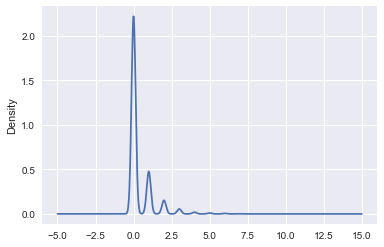

In [411]:
# density plot
df.number_inpatient.plot.density()

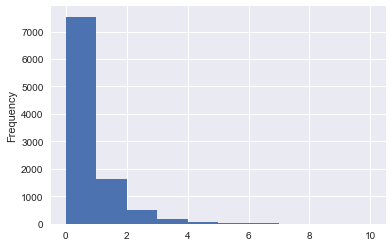

In [412]:
# histogram
df.number_inpatient.plot.hist()

Look for a few things: 
- Anomaly values, e.g. Outliers, values that does not make business sense, etc.
- Extremely skewed features, big difference between mean and median
- Features with few unique values, e.g. Min and 75% values are the same, etc

Take a look at frequency tables for categorical features

In [413]:
# frequency table
df.weight.value_counts(sort=False, dropna=False)

NaN          9592
[0-25)          6
[75-100)      176
[125-150)      18
[100-125)      76
[50-75)       116
[25-50)        12
[150-175)       4
Name: weight, dtype: int64

Frequency table shows that weight column has a large percentage of missing values. This feature may not add much value to the model, but we will keep it in the data for now. 

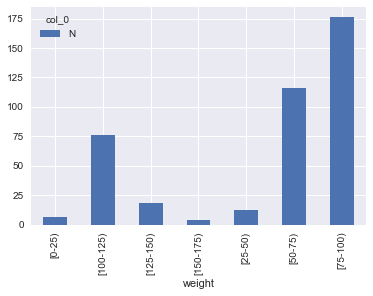

In [414]:
# bar chart
pd.crosstab(df.weight, columns='N').plot.bar()

Generally, you need to continue to review each feature to flag any potential problem. Let's assume that we have done that and move on.....

## Data Preparation

#### Missing value imputation

Take a look at missing value distribution in the data set

In [415]:
df.isnull().sum()

readmitted                     0
race                         221
gender                         0
age                            0
weight                      9592
admission_type_id            721
discharge_disposition_id     469
admission_source_id          936
time_in_hospital               0
payer_code                  5341
medical_specialty           4100
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         2
diag_2                        59
diag_3                       208
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide 

There are many ways to impute missing values depending on variable type and algorithms used to train a model. 
- constant 
- median imputation 
- forward fill 
- backward fill 
- frequency based 
- model based 
- missing value indicator

In [416]:
# impute missing with median 
df = df.fillna(df.median())

In [417]:
# encode categorical missing into a 'MISSING' category
df = df.fillna(value='MISSING')

In [418]:
# check imputation
df.isnull().sum()

readmitted                  0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

### Split data into feature columns and target column

**We will exclude text features for this workshop

In [419]:
X = df.drop(['readmitted','diag_1_desc','diag_2_desc','diag_3_desc'], axis=1)
y = df.readmitted

check dimension of X matrix

In [420]:
X.shape

(10000, 47)

check sample records

In [422]:
X[:3].transpose()

,0,1,2
race,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male
age,[50-60),[20-30),[80-90)
weight,MISSING,[50-75),MISSING
admission_type_id,Elective,Urgent,Not Available
discharge_disposition_id,Discharged to home,Discharged to home,Discharged/transferred to home with home healt...
admission_source_id,Physician Referral,Physician Referral,MISSING
time_in_hospital,1,2,7
payer_code,CP,UN,MC
medical_specialty,Surgery-Neuro,MISSING,Family/GeneralPractice


check shape of y vector

In [423]:
y.shape

(10000,)

check sample records

In [424]:
y[:3]

0    False
1    False
2     True
Name: readmitted, dtype: bool

### one-hot encoding

To train models in python, we need to encode categorical features. We will create dummy variables for each level of the categorical feature. 

In [427]:
# create dummy variables for categorical features
X_encoded = pd.get_dummies(X)
X_encoded[:3]

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,glyburide.metformin_Up,glipizide.metformin_No,glipizide.metformin_Steady,glimepiride.pioglitazone_No,metformin.rosiglitazone_No,metformin.pioglitazone_No,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,1,35,4,21,0,0,0,9,0,0,...,0,1,0,1,1,1,0,1,1,0
1,2,8,5,5,0,0,0,6,0,0,...,0,1,0,1,1,1,0,1,1,0
2,7,12,0,21,0,0,1,9,0,0,...,0,1,0,1,1,1,0,1,0,1


Now, we will partition the data into training/testing sets. Training data is used to tune parameters and produce evaluation metrics for us to pick the best model. Testing data (a.k.a Holdout) is set aside untill we have found the optimal model. It is used at the end to tell us how well our optimal model can generalize once in production. 

In [429]:
# Split the data into 20% testing and 80% training 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

In [434]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(8000, 1567)

(2000, 1567)

(8000,)

(2000,)

Convert pandas dataframe to numpy array

In [435]:
X_train_array = X_train.values
y_train_array = y_train.values
X_test_array = X_test.values
y_test_array = y_test.values

In [437]:
X_train_array.shape
y_train_array.shape
type(X_train_array)
type(y_train_array)

(8000, 1567)

(8000,)

numpy.ndarray

numpy.ndarray

In [438]:
X_test_array.shape
y_test_array.shape
type(X_test_array)
type(y_test_array)

(2000, 1567)

(2000,)

numpy.ndarray

numpy.ndarray

## Feature selection

There are many ways to do feature selection.
- Correlation coefficients to the target, e.g. pearson, etc
- Shrinkage technique, e.g. lasso, elastic net
- Model based methods, which builds mini models for the target feature using each individual feature, and measure the performance of each model. 

Let's run a RandomForest model on each feature and look at the ROC AUC. 

In [444]:
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
names = X_train.columns
 
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
for i in range(X_train_array.shape[1]):
     score = cross_val_score(rf, X_train_array[:, i:i+1], y_train_array, scoring="roc_auc", cv=ShuffleSplit(len(X_train_array), 3, .3))
     scores.append((round(np.mean(score), 3), names[i]))


Take a look at the top feature list

In [443]:
[i[1] for i in sorted(scores, reverse=True)[:20]]

['number_diagnoses',
 'number_inpatient',
 'num_lab_procedures',
 'num_medications',
 'medical_specialty_MISSING',
 'number_outpatient',
 'race_Caucasian',
 'change_No',
 'time_in_hospital',
 'admission_source_id_Emergency Room',
 'number_emergency',
 'discharge_disposition_id_Discharged/transferred to home with home health service',
 'diabetesMed_Yes',
 'change_Ch',
 'age_[80-90)',
 'weight_MISSING',
 'pioglitazone_No',
 'age_[70-80)',
 'admission_type_id_MISSING',
 'race_AfricanAmerican']

It is recommended to try a few feature selection techniques to get a list of candidate features. In the model training stage, you will perform variable selection iteratively as you learn more about how well your features work in the model. 

## Train a simple Model 

Train a simple logistic regression model and compute the CV score

In [445]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression(C=1)
scores = cross_val_score(logreg, X_train_array, y_train_array, cv=5, scoring='roc_auc')
scores.mean()

0.68364912902434871

## Train some Non-linear models

Train a RandomForest Model

In [446]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train_array, y_train_array, cv=5, scoring='roc_auc')
scores.mean()

0.69021720137920961

Train a Gradient Boosting Tree Model. 

In [349]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, subsample=.8, max_features=.5)
scores = cross_val_score(gb, X, Y, cv=5, scoring='roc_auc')
print(scores.mean())

0.695342799464


Both models are slightly better than logistic regression model with respect to ROC AUC. 

## Parameter Tuning

We can find the best values for the parameters automatically through grid search. **Takes a long time to run!** 

In [450]:
# %%timeit
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier(n_estimators=100, subsample=.8)
params = {
    'learning_rate': [0.1, 0.5],
    'max_features': [0.5, 0.1],
    'max_depth': [3, 4],
}
gs = GridSearchCV(gb, params, cv=5, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train_array, y_train_array)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.5], 'max_features': [0.5, 0.1], 'max_depth': [3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Check grid search results

In [451]:
for a, b in zip(gs.cv_results_['params'], gs.cv_results_['mean_test_score']):
    print(a, b)

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.5} 0.699408493029
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.1} 0.697437078758
{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.5} 0.696247884869
{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.1} 0.696708481201
{'learning_rate': 0.5, 'max_depth': 3, 'max_features': 0.5} 0.670115112654
{'learning_rate': 0.5, 'max_depth': 3, 'max_features': 0.1} 0.675582666575
{'learning_rate': 0.5, 'max_depth': 4, 'max_features': 0.5} 0.663967211204
{'learning_rate': 0.5, 'max_depth': 4, 'max_features': 0.1} 0.669128111156


CV scores are very similiar except for learning rate = 0.5

In [452]:
gs.best_score_
gs.best_params_

0.69940849302915098

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.5}

Retrain model with best param setting

In [453]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=.8, max_features=.5, max_depth=3)
gb.fit(X_train_array, y_train_array)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=0.5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

## Make prediction on test data

In [454]:
y_predicted = gb.predict(X_test_array)
y_predicted_prob = gb.predict_proba(X_test_array)

In [455]:
y_predicted
y_predicted_prob

array([False, False, False, ..., False,  True, False], dtype=bool)

array([[ 0.64991503,  0.35008497],
       [ 0.54406874,  0.45593126],
       [ 0.64133005,  0.35866995],
       ..., 
       [ 0.79026487,  0.20973513],
       [ 0.4979407 ,  0.5020593 ],
       [ 0.71596809,  0.28403191]])

Plot ROC Curve

In [457]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
def plot_roc_curve(y, yhat):
    fpr, tpr, thresholds = roc_curve(y, yhat[:, 1])
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

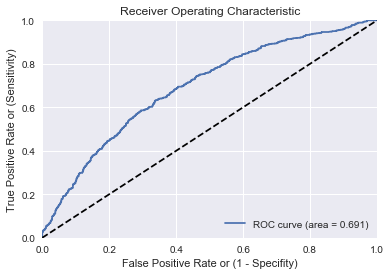

In [458]:
plot_roc_curve(y_test_array, y_predicted_prob)

Show feature importance

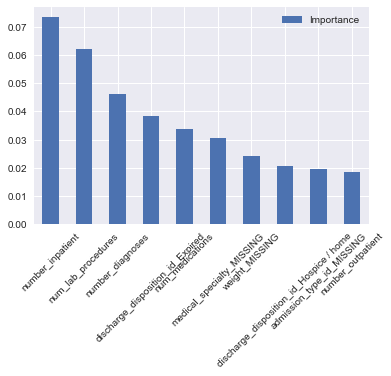

In [478]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_encoded.columns, gb.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False)[:10].plot(kind='bar', rot=45)